Script to read in the SBML v2 models and save as comets 

In [1]:
import cobra
import cobra.test # for the ijo1366 model
import sys
import copy
import numpy as np
import pandas as pd
import cometspy as c
import os

os.environ['COMETS_HOME'] = '/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'
os.environ['JAVA_HOME'] = '/share/pkg.7/java/12.0.1/install'
os.environ['PATH'] = '/projectnb2/talbot-lab-data/zrwerbin/venvs/comets/bin:/share/pkg.7/gurobi/9.1.1/install/bin:/share/pkg.7/python3/3.8.10/install/bin:/share/pkg.7/java/12.0.1/install/bin:/projectnb/talbot-lab-data/zrwerbin/temporal_forecast/data_construction/microbe/16S_copy_num_normalize/copy_num_normalize:/usr/java/default/jre/bin:/usr/java/default/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/dell/srvadmin/bin:/bin:/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'
model_dir = "/projectnb2/talbot-lab-data/metabolic_models/curated_models/" # model location

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# N cycler models from Octavio-Perez 2015
NEU = cobra.io.read_sbml_model(model_dir + '/N_cycle/NEU_v2.xml')
NET = cobra.io.read_sbml_model(model_dir + '/N_cycle/NET_v2.xml')
NMU = cobra.io.read_sbml_model(model_dir + '/N_cycle/NMU_v2.xml')
NOC = cobra.io.read_sbml_model(model_dir + '/N_cycle/NOC_v2.xml')
NDE = cobra.io.read_sbml_model(model_dir + '/N_cycle/NDE_v2.xml')
NWI = cobra.io.read_sbml_model(model_dir + '/N_cycle/NWI_v2.xml')
NHA = cobra.io.read_sbml_model(model_dir + '/N_cycle/NHA_v2.xml')
NSP = cobra.io.read_sbml_model(model_dir + '/N_cycle/NSP_v2.xml')

## Indimesh reduced models, converted to SBML
#iPB = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iPB890_rGEM_v3.xml')
#iJO = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iJO1366_rGEM_v3.xml')
#iRR = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iRR1083_rGEM_v3.xml')
#iJN = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iJN746_rGEM_v3.xml')

Model does not contain SBML fbc package information.


Using license file /usr/local/gurobi/gurobi.lic
Set parameter TokenServer to value sccsvc


SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Adding exchange reaction EX_nh4_e with default bounds for boundary metabolite: nh4_e.
Adding exchange reaction EX_o2_e with default bounds for boundary metabolite: o2_e.
Adding exchange reaction EX_no2_e with default bounds for boundary metabolite: no2_e.
Adding exchange reaction EX_h_e with default bounds for boundary metabolite: h_e.
Adding exchange reaction EX_n2o_e with default bounds for boundary metabolite: n2o_e.
Adding exchange reaction EX_no_e with default bounds for boundary metabolite: no_e.
Adding exchange reaction EX_nh2oh_e with default bounds for boundary metabolite: nh2oh_e.
Adding exchange reaction EX_biomass_e with default bounds for boundary metabolite: biomass_e.
Adding exchange reaction EX_pi_e with default bounds for boundary metabolite: pi_e.
Adding exchange reaction EX_h2o_e with default bounds for boundary metabolit

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx11>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx12>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx13>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx104>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx105>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx106>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx107>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx108>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx150>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx151>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx152>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx153>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx154>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx155>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx156>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx157>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds in

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx147>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx148>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx149>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx150>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx151>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx152>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx153>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx154>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx155>
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx196>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx197>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx198>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx199>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx200>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx201>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx202>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx203>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds in

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx203>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx204>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx205>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx206>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx207>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx208>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx209>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx210>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx211>
E

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx251>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx252>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx252>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx253>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx253>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx254>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx254>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx255>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes ele

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx251>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx252>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx253>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx254>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx255>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx256>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx257>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx258>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx259>
E

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx295>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx296>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx296>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx297>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx297>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx298>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx298>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx299>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes ele

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx1>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx2>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx3>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx4>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx5>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx6>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx7>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx8>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx9>
Encoding OBJECTIVE_

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx4>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx5>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx6>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx7>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx8>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx9>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx10>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx11>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reacti

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx347>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx348>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx349>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx350>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx351>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx352>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx353>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx354>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds in

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx356>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx357>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx358>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx359>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx360>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx361>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx362>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx363>
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_Rx364>
E

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx400>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx400>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx401>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx401>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx402>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx402>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Rx403>
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_Rx403>
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discou

In [3]:
#NEU.boundary

NEU.objective = 'EX_biomass_e'
NET.objective = 'EX_biomass_e'
NMU.objective = 'EX_biomass_e'
NOC.objective = 'EX_biomass_e'
NDE.objective = 'EX_biomass_e'
NWI.objective = 'EX_biomass_e'
NHA.objective = 'EX_biomass_e'
NSP.objective = 'EX_biomass_e'

#NEU.reactions.get_by_id("Rx6")


In [4]:
NET.boundary
NET.summary()

[<Reaction EX_nh4_e at 0x2b872b54d9a0>,
 <Reaction EX_no2_e at 0x2b86f98d2d90>,
 <Reaction EX_h_e at 0x2b872b5af490>,
 <Reaction EX_o2_e at 0x2b872b5af5b0>,
 <Reaction EX_n2o_e at 0x2b872b5af6d0>,
 <Reaction EX_no_e at 0x2b872b5af7f0>,
 <Reaction EX_nh2oh_e at 0x2b872b5af910>,
 <Reaction EX_no3_e at 0x2b872b5afa30>,
 <Reaction EX_biomass_e at 0x2b872b5afb50>,
 <Reaction EX_pi_e at 0x2b872b5afc70>,
 <Reaction EX_h2o_e at 0x2b872b5afd90>,
 <Reaction EX_co2_e at 0x2b872b5afeb0>,
 <Reaction EX_n2_e at 0x2b872b5affd0>,
 <Reaction Rx1 at 0x2b872b5e9bb0>,
 <Reaction Rx2 at 0x2b872b5f0b20>,
 <Reaction Rx3 at 0x2b872b5f6e80>,
 <Reaction Rx4 at 0x2b872b5f6f10>,
 <Reaction Rx5 at 0x2b872b5f6970>,
 <Reaction Rx6 at 0x2b872b5f6670>,
 <Reaction Rx7 at 0x2b872b5f9400>,
 <Reaction Rx8 at 0x2b872b5f9520>,
 <Reaction Rx9 at 0x2b872b5f9640>,
 <Reaction Rx10 at 0x2b872b5f9760>,
 <Reaction Rx11 at 0x2b872b5f9880>,
 <Reaction Rx12 at 0x2b872b5f98b0>,
 <Reaction Rx13 at 0x2b872b5f9ac0>]

Metabolite,Reaction,Flux,C-Number,C-Flux
nh2oh_e,EX_nh2oh_e,588.7,0,0.00%
no_e,EX_no_e,28.79,0,0.00%
nh4_e,Rx1,11.09,0,0.00%
co2_e,Rx12,44.36,0,0.00%
o2_e,Rx2,404.4,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-11.09,0,0.00%
h2o_e,EX_h2o_e,-382.5,0,0.00%
h_e,EX_h_e,-348.6,0,0.00%
h_e,Rx13,-1000,0,0.00%


Set maximum growth rate of Nitrospira defluvii based on values from Winkler et al. 2017: daily maximum growth rate of .67/day, or .028/hour

In [5]:
NDE.summary()
#NDE.reactions.get_by_id('EX_biomass_e').upper_bound = .67 
NDE.reactions.get_by_id('EX_biomass_e').upper_bound = .028

Metabolite,Reaction,Flux,C-Number,C-Flux
no2_e,EX_no2_e,985.7,0,0.00%
nh4_e,Rx1,2.728,0,0.00%
co2_e,Rx12,10.91,0,0.00%
o2_e,Rx2,476.5,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-2.728,0,0.00%
h2o_e,EX_h2o_e,-14.3,0,0.00%
h_e,EX_h_e,-628,0,0.00%
no3_e,Rx4,-985.7,0,0.00%


Set maximum growth rate of two Nitrosomonas species based on N. eutropha doubling time (6.38 h) (Sabale et al. 2021),  converted to growth rate is 2.6 per day, or .11 per hour


In [6]:
NEU.summary()
#NEU.reactions.get_by_id('EX_biomass_e').upper_bound = 2.67
NEU.reactions.get_by_id('EX_biomass_e').upper_bound = .11

NET.summary()
#NET.reactions.get_by_id('EX_biomass_e').upper_bound = 2.67
NET.reactions.get_by_id('EX_biomass_e').upper_bound = .11

Metabolite,Reaction,Flux,C-Number,C-Flux
nh2oh_e,EX_nh2oh_e,588.7,0,0.00%
nh4_e,Rx1,11.09,0,0.00%
co2_e,Rx12,44.36,0,0.00%
o2_e,Rx2,404.4,0,0.00%
no_e,Rx6,28.79,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-11.09,0,0.00%
h2o_e,EX_h2o_e,-382.5,0,0.00%
h_e,EX_h_e,-348.6,0,0.00%
h_e,Rx13,-1000,0,0.00%


Metabolite,Reaction,Flux,C-Number,C-Flux
nh2oh_e,EX_nh2oh_e,588.7,0,0.00%
no_e,EX_no_e,28.79,0,0.00%
nh4_e,Rx1,11.09,0,0.00%
co2_e,Rx12,44.36,0,0.00%
o2_e,Rx2,404.4,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-11.09,0,0.00%
h2o_e,EX_h2o_e,-382.5,0,0.00%
h_e,EX_h_e,-348.6,0,0.00%
h_e,Rx13,-1000,0,0.00%


Set maximum growth rate of Nitrospina based on generic NOB doubling time of 30h (Prosser et al. 2005), daily growth rate = ln(2)/(doubling time in hours/24) = .55/day

In [7]:
NSP.summary()
#NSP.reactions.get_by_id('EX_biomass_e').upper_bound = .55
NSP.reactions.get_by_id('EX_biomass_e').upper_bound = .023


Metabolite,Reaction,Flux,C-Number,C-Flux
no2_e,EX_no2_e,801.9,0,0.00%
nh4_e,Rx1,4.603,0,0.00%
co2_e,Rx12,18.41,0,0.00%
o2_e,Rx2,409.5,0,0.00%
no_e,Rx6,48.28,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-4.603,0,0.00%
h_e,EX_h_e,-1000,0,0.00%
h_e,Rx13,-108.1,0,0.00%
no3_e,Rx4,-850.1,0,0.00%


Set maximum growth rate of NMU and NOC based on generic AOB growth rate of 1.4/day (Munz et al. 2011)

In [8]:
NMU.summary()
#NMU.reactions.get_by_id('EX_biomass_e').upper_bound = 1.4
NMU.reactions.get_by_id('EX_biomass_e').upper_bound = .058

NOC.summary()
#NOC.reactions.get_by_id('EX_biomass_e').upper_bound = 1.4
NOC.reactions.get_by_id('EX_biomass_e').upper_bound = .058


Metabolite,Reaction,Flux,C-Number,C-Flux
nh2oh_e,EX_nh2oh_e,294.7,0,0.00%
nh4_e,Rx1,192.9,0,0.00%
co2_e,Rx12,30.56,0,0.00%
o2_e,Rx2,526.7,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-7.64,0,0.00%
h2o_e,EX_h2o_e,-520,0,0.00%
h_e,Rx13,-480,0,0.00%
no2_e,Rx3,-480,0,0.00%


Metabolite,Reaction,Flux,C-Number,C-Flux
nh2oh_e,EX_nh2oh_e,532.7,0,0.00%
nh4_e,Rx1,8.089,0,0.00%
co2_e,Rx12,32.36,0,0.00%
o2_e,Rx2,418.8,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-8.089,0,0.00%
n2o_e,EX_n2o_e,-130.7,0,0.00%
h2o_e,Rx11,-575.1,0,0.00%
h_e,Rx13,-401.9,0,0.00%
no2_e,Rx3,-401.9,0,0.00%


Set maximum growth rate of Nitrospira winogradskyi (1.6) and average Nitrospira (.9( based on values summarized in Winkler et al. 2017: daily maximum growth rate of .67/day


In [9]:

NWI.summary()
#NWI.reactions.get_by_id('EX_biomass_e').upper_bound = 1.6
NWI.reactions.get_by_id('EX_biomass_e').upper_bound = .07

NHA.summary()
#NHA.reactions.get_by_id('EX_biomass_e').upper_bound = .9
NHA.reactions.get_by_id('EX_biomass_e').upper_bound = .038

Metabolite,Reaction,Flux,C-Number,C-Flux
no2_e,EX_no2_e,639.5,0,0.00%
nh4_e,Rx1,4.603,0,0.00%
h2o_e,Rx11,31.1,0,0.00%
co2_e,Rx12,18.41,0,0.00%
o2_e,Rx2,375,0,0.00%
no_e,Rx6,110.5,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-4.603,0,0.00%
h_e,EX_h_e,-1000,0,0.00%
h_e,Rx13,-170.3,0,0.00%


Metabolite,Reaction,Flux,C-Number,C-Flux
no2_e,EX_no2_e,801.9,0,0.00%
nh4_e,Rx1,4.603,0,0.00%
co2_e,Rx12,18.41,0,0.00%
o2_e,Rx2,409.5,0,0.00%
no_e,Rx6,48.28,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-4.603,0,0.00%
h_e,EX_h_e,-1000,0,0.00%
h_e,Rx13,-108.1,0,0.00%
no3_e,Rx4,-850.1,0,0.00%


In [10]:
NEU.metabolites

[<Metabolite nh4_e at 0x2b872b286cd0>,
 <Metabolite nh3_p at 0x2b872b2868b0>,
 <Metabolite h_p at 0x2b872b286d60>,
 <Metabolite o2_e at 0x2b872b286b80>,
 <Metabolite o2_p at 0x2b872b286bb0>,
 <Metabolite no2_e at 0x2b872b286d90>,
 <Metabolite h_e at 0x2b872b286dc0>,
 <Metabolite hno2_p at 0x2b872b286df0>,
 <Metabolite n2o_e at 0x2b872b286b50>,
 <Metabolite n2o_p at 0x2b872b286e20>,
 <Metabolite no_e at 0x2b872b286e50>,
 <Metabolite no_p at 0x2b872b286e80>,
 <Metabolite nh2oh_e at 0x2b872b286eb0>,
 <Metabolite nh2oh_p at 0x2b872b286f10>,
 <Metabolite biomass_e at 0x2b872b286ee0>,
 <Metabolite biomass_p at 0x2b872b286f40>,
 <Metabolite pi_e at 0x2b872b286f70>,
 <Metabolite pi_p at 0x2b872b286fd0>,
 <Metabolite h2o_e at 0x2b872b286fa0>,
 <Metabolite h2o_p at 0x2b872b2868e0>,
 <Metabolite co2_e at 0x2b872b2869d0>,
 <Metabolite co2_p at 0x2b872b286af0>,
 <Metabolite h_c at 0x2b872b286ac0>,
 <Metabolite nh3_c at 0x2b872b286d30>,
 <Metabolite o2_c at 0x2b872b2ab0d0>,
 <Metabolite biomass_c at

Fix metabolite names so that they can be exchanged with other species

In [11]:
solution = NET.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NEU.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NMU.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NOC.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NDE.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NWI.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NHA.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

solution = NSP.optimize()
print('Growth Rate: '+str(solution.objective_value)+' 1/h')

#solution = iPB.optimize()
#print('Growth Rate: '+str(solution.objective_value)+' 1/h')
#
#solution = iJO.optimize()
#print('Growth Rate: '+str(solution.objective_value)+' 1/h')
#
#solution = iRR.optimize()
#print('Growth Rate: '+str(solution.objective_value)+' 1/h')
#
#solution = iJN.optimize()
#print('Growth Rate: '+str(solution.objective_value)+' 1/h')
#
#solution = iJN_full.optimize()
#print('Growth Rate: '+str(solution.objective_value)+' 1/h')

Growth Rate: 0.11 1/h
Growth Rate: 0.11 1/h
Growth Rate: 0.058 1/h
Growth Rate: 0.058 1/h
Growth Rate: 0.028 1/h
Growth Rate: 0.07 1/h
Growth Rate: 0.038 1/h
Growth Rate: 0.023 1/h


In [12]:
NEU_c = c.model(NEU)
NEU_c.get_bounds("EX_biomass_e")

(-1000.0, 0.11)

In [13]:

NEU_c = c.model(NEU)
NEU_c.ensure_sinks_are_not_exchanges()

NET_c = c.model(NET)
NET_c.ensure_sinks_are_not_exchanges()

NMU_c = c.model(NMU)
NMU_c.ensure_sinks_are_not_exchanges()
#NMU_c.open_exchanges()

NOC_c = c.model(NOC)
NOC_c.ensure_sinks_are_not_exchanges()
#NOC_c.open_exchanges()

NDE_c = c.model(NDE)
NDE_c.ensure_sinks_are_not_exchanges()
#NDE_c.open_exchanges()

NWI_c = c.model(NWI)
NWI_c.ensure_sinks_are_not_exchanges()
#NWI_c.open_exchanges()

NHA_c = c.model(NHA)
NHA_c.ensure_sinks_are_not_exchanges()
#NHA_c.open_exchanges()

NSP_c = c.model(NSP)
NSP_c.ensure_sinks_are_not_exchanges()
#NSP_c.open_exchanges()

In [14]:
#iPB_c.id = "P_stutzeri"
#iJO_c.id = "E_coli"
#iRR_c.id = "S_enterica"
#iJN_c.id = "P_putida"
NEU_c.id = "N_europaea_AOB"
NET_c.id = "N_eutropha_AOB"
NMU_c.id = "N_multiformis_AOB"
NOC_c.id = "N_oceani_AOB"
NDE_c.id = "N_defluvii_NOB"
NWI_c.id = "N_winogradskyi_NOB"
NHA_c.id = "N_hamburgensis_NOB"
NSP_c.id = "N_gracilis_NOB"

In [15]:
NEU_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NET_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NMU_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NOC_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NDE_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NWI_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NHA_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
NSP_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')

In [16]:
model_dir = '/projectnb2/talbot-lab-data/zrwerbin/interactions/models'

iAF9 = cobra.io.read_sbml_model(model_dir + '/bigg/iAF987.xml')
iAF6 = cobra.io.read_sbml_model(model_dir + '/bigg/iAF692.xml')
Nitro = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/Nitrospira_bigg_ids2.xml')
iRR = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iRR1083_rGEM_v3.xml')
iJO = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iJO1366_rGEM_v3.xml')
iPB = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iPB890_rGEM_v3.xml')
iJN = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iJN746_rGEM_v3.xml')



model_list = [iRR, iJO, iPB, iJN, iAF9, iAF6, 
              Nitro]
for mod in model_list:
    solution = mod.optimize()
    print(mod.id, 'Growth Rate: '+str(solution.objective_value)+' 1/h')

'' is not a valid SBML 'SId'.


iRR1083 Growth Rate: 2.3169004125279895 1/h
iJO1366 Growth Rate: 2.702439356885505 1/h
iPB890 Growth Rate: 1.5171672392194477 1/h
iJN746 Growth Rate: 2.0 1/h
iAF987 Growth Rate: 0.047322435050338375 1/h
iAF692 Growth Rate: 0.026780467547180845 1/h
 Growth Rate: 0.006338097954767458 1/h


In [17]:
iAF9_c = c.model(iAF9)
iAF6_c = c.model(iAF6)
Nitro_c = c.model(Nitro)
Nitro_c.id = "Nitrospira_NOB"
iRR_c = c.model(iRR)
iJO_c = c.model(iJO)
iPB_c = c.model(iPB)
iJN_c = c.model(iJN)

model_list = [iRR_c,
              iJO_c,
              iPB_c, 
              iJN_c,
             iAF9_c,
              iAF6_c,
                Nitro_c]

for mod in model_list:
    mod.ensure_sinks_are_not_exchanges()
    mod.open_exchanges()

In [22]:
# e coli max growth rate, find better source
iJO_c.change_bounds('Ec_biomass_iJO1366_WT_53p95M', -1000,  .7)

# salmonella max growth rate, multiple sources, e.g. McAuley 2015
iRR_c.change_bounds('biomass_iRR1083_metals', -1000,  .84)

# p. putida max growth rate, Wang et al. 2019
iJN_c.change_bounds('GROWTH', -1000,  .61)

# p. stutzeri max growth rate, find source, assuming same as above
iPB_c.change_bounds('IR10372', -1000,  .61)



In [23]:
# Geobacter metallireducens , Marozava et al. 2014
iAF9_c.change_bounds('BIOMASS_Gm_GS15_core_79p20M', -1000,  .06)

# M. barkeri, .02 from Yang & Okos 1987
iAF6_c.change_bounds('BIOMASS_Mb_30', -1000,  .02)


In [24]:
model_dir = "/projectnb2/talbot-lab-data/metabolic_models/curated_models/" # model location

iJO_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
iRR_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
iJN_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
iPB_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
iAF9_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
iAF6_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')
Nitro_c.write_comets_model(model_dir + '/N_cycle/comets/not_metanet_')

Our simulated world will be a 100x100 box lattice. The left-hand side, where x = 0, will be the root. The top, where y = 0, will be the air. Therefore, the biomass and the rocks will be distributed everywhere else. To ensure that we don't attempt to place biomass where rocks are placed, we first determine the rock locations. Specifically, we will create 70 rocks which are impervious to any biomass or metabolite. These rocks will have an average size of 15 boxes. To pick these locations, we use the helper function grow_rocks, in the utils subpackage:

In [8]:
from cometspy.utils import grow_rocks, pick_random_locations

grid_width =  10 # narrow, so we can really look at stratification
grid_height =  60
n_rocks = 30 # 70
rock_locs = grow_rocks(n = n_rocks, xrange = [1,grid_width-1],yrange = [1,grid_height-1],mean_size = 2)

Each species will have biomass seeded at 60 different locations, with no overlap. We will use the helper function pick_random_locations for this, which is useful as it can take in a previously-generated list of tuples of x-y locations as “forbidden” locations, such as the rock locations.

First we make a copy of the rock_locs so we don't accidentally alter it, and call this copy forbidden_locs.


Next we pick the random locations for each species, adding these locations to the forbidden locs as we go so as to prevent overlap.


In [9]:
import copy
forbidden_locs = copy.deepcopy(rock_locs)

founders_per_species = 30 # 60
n_species = 12
init_locs = pick_random_locations(n = founders_per_species*n_species, 
                                   xrange = [1,grid_width], yrange = [1,grid_height], 
                                   forbidden_locs = forbidden_locs)

spec1_locs = init_locs[1:founders_per_species]
spec2_locs = init_locs[founders_per_species+1:founders_per_species*2]
spec3_locs = init_locs[founders_per_species*2+1:founders_per_species*3]
spec4_locs = init_locs[founders_per_species*3+1:founders_per_species*4]
spec5_locs = init_locs[founders_per_species*4+1:founders_per_species*5]
spec6_locs = init_locs[founders_per_species*5+1:founders_per_species*6]
spec7_locs = init_locs[founders_per_species*6+1:founders_per_species*7]
spec8_locs = init_locs[founders_per_species*7+1:founders_per_species*8]
spec9_locs = init_locs[founders_per_species*8+1:founders_per_species*9]
spec10_locs = init_locs[founders_per_species*9+1:founders_per_species*10]
spec11_locs = init_locs[founders_per_species*10+1:founders_per_species*11]
spec12_locs = init_locs[founders_per_species*11+1:founders_per_species*12]

# Check that there is no overlap (kind of random)
set(spec1_locs) & set(spec2_locs)
set(spec2_locs) & set(spec3_locs)
set(spec1_locs) & set(spec3_locs)
set(spec4_locs) & set(spec2_locs)
set(spec4_locs) & set(spec3_locs)
set(spec5_locs) & set(spec3_locs)
set(spec5_locs) & set(spec2_locs)
set(spec6_locs) & set(spec3_locs)
set(spec6_locs) & set(spec3_locs)
set(spec7_locs) & set(spec3_locs)
set(spec7_locs) & set(spec3_locs)
set(spec8_locs) & set(spec3_locs)
set(spec8_locs) & set(spec3_locs)
set(spec10_locs) & set(spec3_locs)
set(spec11_locs) & set(spec3_locs)
#spec3_locs

#iMM_locs = pick_random_locations(founders_per_species, [1,grid_width],[1,grid_height], forbidden_locs)
#forbidden_locs.extend(iMM_locs)

set()

set()

set()

set()

set()

set()

set()

set()

set()

set()

set()

set()

set()

set()

set()

In [10]:
# We set the initial population for each species by using a python list comprehension.

NEU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec1_locs]
NET_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec2_locs]
NMU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec3_locs]
NOC_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec4_locs]
NDE_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec5_locs]
NWI_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec6_locs]
NHA_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec7_locs]
NSP_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec8_locs]
#iPB_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec9_locs]
#iJO_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec10_locs]
#iRR_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec11_locs]
#iJN_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec12_locs]

If we wish to take a look at what locations were chosen, we can easily make an image with matplotlib:

Text(0.5, 1.0, 'species 1-3')

Text(0.5, 1.0, 'species 4-6')

Text(0.5, 1.0, 'species 7-9')

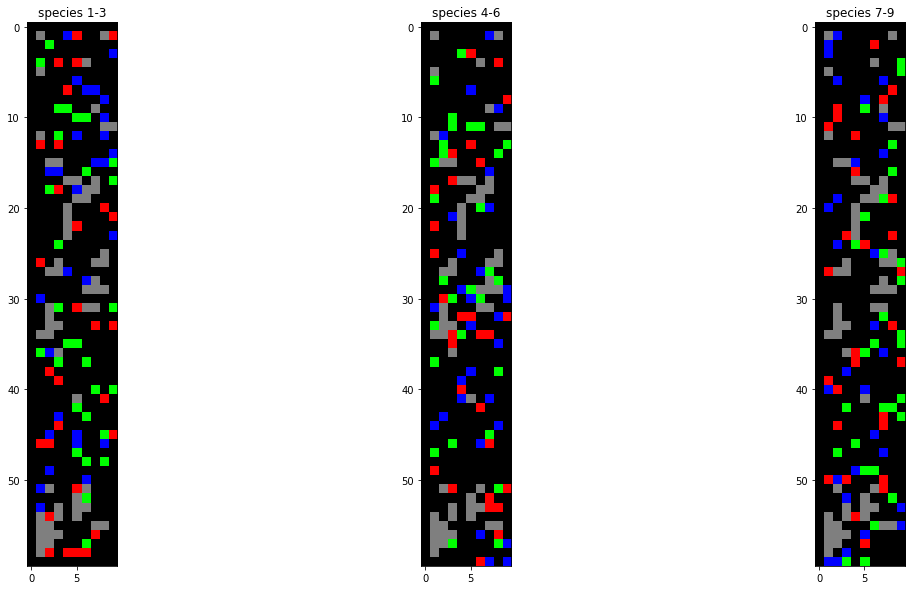

In [110]:
from matplotlib import pyplot as plt
initial_image = np.zeros((grid_height,grid_width,3))
for rock in rock_locs:
    initial_image[rock[1], rock[0]] = .5
for loc in spec1_locs:
    initial_image[loc[1],loc[0],0] = 1
for loc in spec2_locs:
    initial_image[loc[1],loc[0],1] = 1
for loc in spec3_locs:
    initial_image[loc[1],loc[0],2] = 1

initial_image2 = np.zeros((grid_height,grid_width,3))
for rock in rock_locs:
    initial_image2[rock[1],rock[0],0:3] = 0.5 
for loc in spec4_locs:
    initial_image2[loc[1],loc[0],0] = 1
for loc in spec5_locs:
    initial_image2[loc[1],loc[0],1] = 1
for loc in spec6_locs:
    initial_image2[loc[1],loc[0],2] = 1
    
initial_image3 = np.zeros((grid_height,grid_width,3))
for rock in rock_locs:
    initial_image3[rock[1],rock[0],0:3] = 0.5 
for loc in spec7_locs:
    initial_image3[loc[1],loc[0],0] = 1
for loc in spec8_locs:
    initial_image3[loc[1],loc[0],1] = 1
for loc in spec9_locs:
    initial_image3[loc[1],loc[0],2] = 1

initial_figure, initial_axis = plt.subplots(1, 3)
initial_axis[0].imshow(initial_image)
initial_axis[0].set_title("species 1-3")
initial_axis[1].imshow(initial_image2)
initial_axis[1].set_title("species 4-6")
initial_axis[2].imshow(initial_image3)
initial_axis[2].set_title("species 7-9")
initial_figure.set_figheight(10)
initial_figure.set_figwidth(20)
plt.show(initial_figure)

Add models to the layout.

In [123]:
layout = c.layout()
#layout.grid = [grid_height,grid_width]
layout.grid = [grid_width,grid_height]
layout.add_barriers(rock_locs)
layout.add_model(NEU_c)
layout.add_model(NET_c)
layout.add_model(NMU_c)
layout.add_model(NOC_c)
layout.add_model(NDE_c)
layout.add_model(NWI_c)
layout.add_model(NHA_c)
layout.add_model(NSP_c)
layout.add_model(iPB_c)
layout.add_model(iJO_c)
layout.add_model(iRR_c)
layout.add_model(iJN_c)

building empty layout model
models will need to be added with layout.add_model()


We want some metabolites available initially. These include all the typical trace nutrients needed, so we start with the helper function.

After that, however, we want oxygen to mostly diffuse from the air, so we set that value lower. We also add a few other trace metabolites homogeneously throughout the environment that were not added with the helper function.

To make the air layer, we set static media, which keep that metabolite at a fixed value.  We also set a static level of zero oxygen at the "bottom," to mimic continuous downwards diffusion.
In a similar fashion, we set a static sink of ammonium where the “root” is.
In contrast to ammonia, which we assume is always entirely consumed by the root, we assume the root drips organic acids and methanol into the environment at fixed rate, so we use a refresh function.

In [124]:
#layout_high_ammonium.add_typical_trace_metabolites()
trace_metabolites = ['ca2_e','cl_e','cobalt2_e',
                     'cu2_e','fe2_e','fe3_e',
                     'h_e','k_e','h2o_e',
                     'mg2_e','mn2_e','mobd_e',
                     'na1_e','ni2_e',
                     'o2_e','pi_e','so4_e','zn2_e']

for met in trace_metabolites:
    if met in set(layout.media['metabolite']):
        layout.set_specific_metabolite(met,1000)

layout.set_specific_metabolite('no2_e',.0001)
layout.set_specific_metabolite('no3_e',.0001)
layout.set_specific_metabolite('co2_e',1000)

# set static media of O2 and CO2 at the top and bottom-- the "air" and continuous loss of O2 downwards

# low o2 most places
layout.set_specific_metabolite('o2_e',0.0001) # majority of the soil: low o2

#for x in range(grid_width):
#    layout.set_specific_static_at_location('o2_e', (x,0), .1) # top
#    layout.set_specific_static_at_location('co2_e', (x,0), .0001)
#    layout.set_specific_static_at_location('o2_e', (x,grid_height-1), 0.) # bottom: zero, sink for o2
#
# Sink for ammonium (root)


#layout.set_specific_static_at_location('nh4_e', (0,1), 0.0)

#for x in range(grid_height):
#    layout.set_specific_static_at_location('nh4_e', (0,x), 0.0)
    
#layout.media = layout.media.reset_index(drop=True)

We are now done prepping the models and the layout. Next we setup the simulation parameters. Note the positive death rate.
